In [1]:
from ucimlrepo import fetch_ucirepo
from mlp import Linear, Relu, SquaredError, Layer, MultilayerPerceptron, Tanh
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt




In [2]:
auto_mpg = fetch_ucirepo(id=9)

x = auto_mpg.data.features #only has numerical features, 7 columns
y=auto_mpg.data.targets #mpg

print("Features sample:")
print(x.head()) 
print("\nTarget sample:")
print(y.head())


Features sample:
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

Target sample:
    mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


In [ ]:
data = pd.concat([x, y], axis=1)
cleaned_data = data.dropna()
x = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]
print("Shape of x:", x.shape) 


Shape of x: (392, 7)


In [4]:
x_train, x_leftover, y_train, y_leftover = train_test_split(
   x, y,
    test_size=0.3,
    random_state=42,
    shuffle = True
)
x_val, x_test, y_val, y_test = train_test_split(
    x_leftover, y_leftover,
    test_size = 0.5,
    random_state = 42,
    shuffle = True
)

In [5]:
# Compute statistics for X (features)
x_mean = x_train.mean(axis=0)  # Mean of each feature
x_std = x_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

x_train.shape

print(f"Samples in Training:   {len(x_train)}")
print(f"Samples in Validation: {len(x_val)}")
print(f"Samples in Testing:    {len(x_test)}")



Samples in Training:   274
Samples in Validation: 59
Samples in Testing:    59


In [6]:
x_train_np = x_train.to_numpy()
x_val_np = x_val.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_val_np = y_val.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)


In [7]:
input_dimensions = x_train_np.shape[1]
y_dimensions = 1

layer_one = Layer(fan_in=input_dimensions, fan_out=32, activation_function=Relu())
layer_two = Layer(fan_in=32, fan_out=16, activation_function=Relu())
layer_three = Layer(fan_in = 16, fan_out=8, activation_function=Relu() )
layer_four = Layer(fan_in =8, fan_out=y_dimensions, activation_function=Linear() )


In [8]:
model = MultilayerPerceptron(layers=(layer_one, layer_two, layer_three, layer_four))
loss_function = SquaredError()
learning_rate = 0.001
batch_size = 16
epochs = 200


In [9]:
print("\nStarting the training...\n")
training_losses, validation_losses = model.train(
    train_x=x_train_np,
    train_y=y_train_np,
    val_x=x_val_np,
    val_y=y_val_np,
    loss_func=loss_function,
    learning_rate=learning_rate,
    batch_size=batch_size,
    epochs=epochs
)


Starting the training...

Current epoch: 1/200
Training Loss: 0.4700
Validation Loss: 0.2713
Current epoch: 2/200
Training Loss: 0.2923
Validation Loss: 0.1991
Current epoch: 3/200
Training Loss: 0.2608
Validation Loss: 0.1629
Current epoch: 4/200
Training Loss: 0.1649
Validation Loss: 0.1384
Current epoch: 5/200
Training Loss: 0.1379
Validation Loss: 0.1216
Current epoch: 6/200
Training Loss: 0.1269
Validation Loss: 0.1101
Current epoch: 7/200
Training Loss: 0.1133
Validation Loss: 0.1009
Current epoch: 8/200
Training Loss: 0.1023
Validation Loss: 0.0927
Current epoch: 9/200
Training Loss: 0.1005
Validation Loss: 0.0853
Current epoch: 10/200
Training Loss: 0.0908
Validation Loss: 0.0789
Current epoch: 11/200
Training Loss: 0.0840
Validation Loss: 0.0724
Current epoch: 12/200
Training Loss: 0.0831
Validation Loss: 0.0676
Current epoch: 13/200
Training Loss: 0.0773
Validation Loss: 0.0634
Current epoch: 14/200
Training Loss: 0.0751
Validation Loss: 0.0598
Current epoch: 15/200
Training

In [10]:
test_predictions, _ = model.forward(x_test_np)
test_loss = np.mean(loss_function.loss(y_test_np, test_predictions))
print(f"\nFinal Test Loss: {test_loss:.4f}")



Final Test Loss: 0.0532


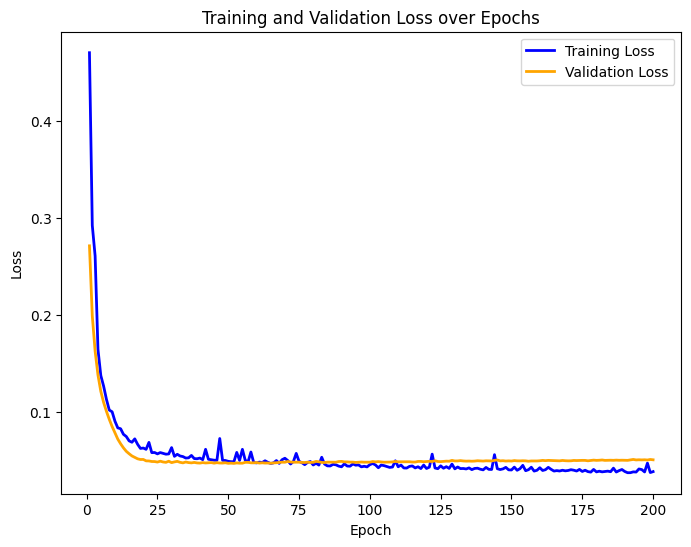

In [11]:
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, training_losses, label='Training Loss', linewidth=2, color='blue')
plt.plot(epochs_range, validation_losses, label='Validation Loss', linewidth=2, color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()